Plots how the base fee will be impacted by changing the target block fullness

Interesting blocks
- [5933605](https://moonbeam.moonscan.io/block/5933605) April 13, 8:00 AM UTC (XEN activity day)
- [5937136](https://moonbeam.moonscan.io/block/5937136) April 13, 8:00 PM UTC (XEN activity day)
- [5937656](https://moonbeam.moonscan.io/block/5937656) Apr-13-2024 09:46:48 PM +UTC


In [3]:
from tkinter import Tk, filedialog

# Function to open a file dialog and select a JSON file
def select_file():
    root = Tk()
    root.withdraw()  # Hide the root window
    file_path = filedialog.askopenfilename(
        title="Select a JSON file",
        filetypes=[("JSON files", "*.json")],
        initialdir='.'  # Starting directory for the file dialog
    )
    return file_path



# Select file
file_path = select_file()
if not file_path:
    print("No file selected. Exiting...")
    exit()

KeyboardInterrupt: 

In [4]:
import matplotlib.pyplot as plt
import json
import os


# Function to read data from a JSON file
def read_data_from_file(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

def plot_data(file_path):
    # Extracting data for plotting
    data = read_data_from_file(os.path.join("data", file_path))
    data_dict = {}
    for entry in data:
        block = entry['h']
        for fee in entry['d']:
            target_fullness = fee['t']
            base_fee = fee['f']
            if target_fullness not in data_dict:
                data_dict[target_fullness] = {"blocks": [], "base_fees": []}
            data_dict[target_fullness]["blocks"].append(block)
            data_dict[target_fullness]["base_fees"].append(base_fee)

    # Plotting
    plt.figure(figsize=(30, 12))
    for target_fullness, values in data_dict.items():
        plt.plot(values["blocks"], values["base_fees"], linewidth=0.8, linestyle='-', label=f'Target Fullness {target_fullness}%')

    plt.yscale('log')  # Set y-axis to logarithmic scale
    plt.title('Base Fee vs Block Number for Different Target Fullness Levels')
    plt.xlabel('Block Number')
    plt.ylabel('Base Fee (in Wei)')
    plt.legend(title='Target Fullness')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    step = max(1, len(data_dict[list(data_dict.keys())[0]]["blocks"]) // 20)
    plt.xticks(ticks=data_dict[list(data_dict.keys())[0]]["blocks"][::step], 
           labels=[str(block) for block in data_dict[list(data_dict.keys())[0]]["blocks"][::step]], rotation=45)

    plt.show()


## Moonbeam network

From block  39 days ago (Apr-13-2024 07:42:18 PM +UTC)  https://moonbeam.moonscan.io/block/5937050
To block  39 days ago (Apr-14-2024 05:50:30 AM +UTC)  https://moonbeam.moonscan.io/block/5940050

around 10hours

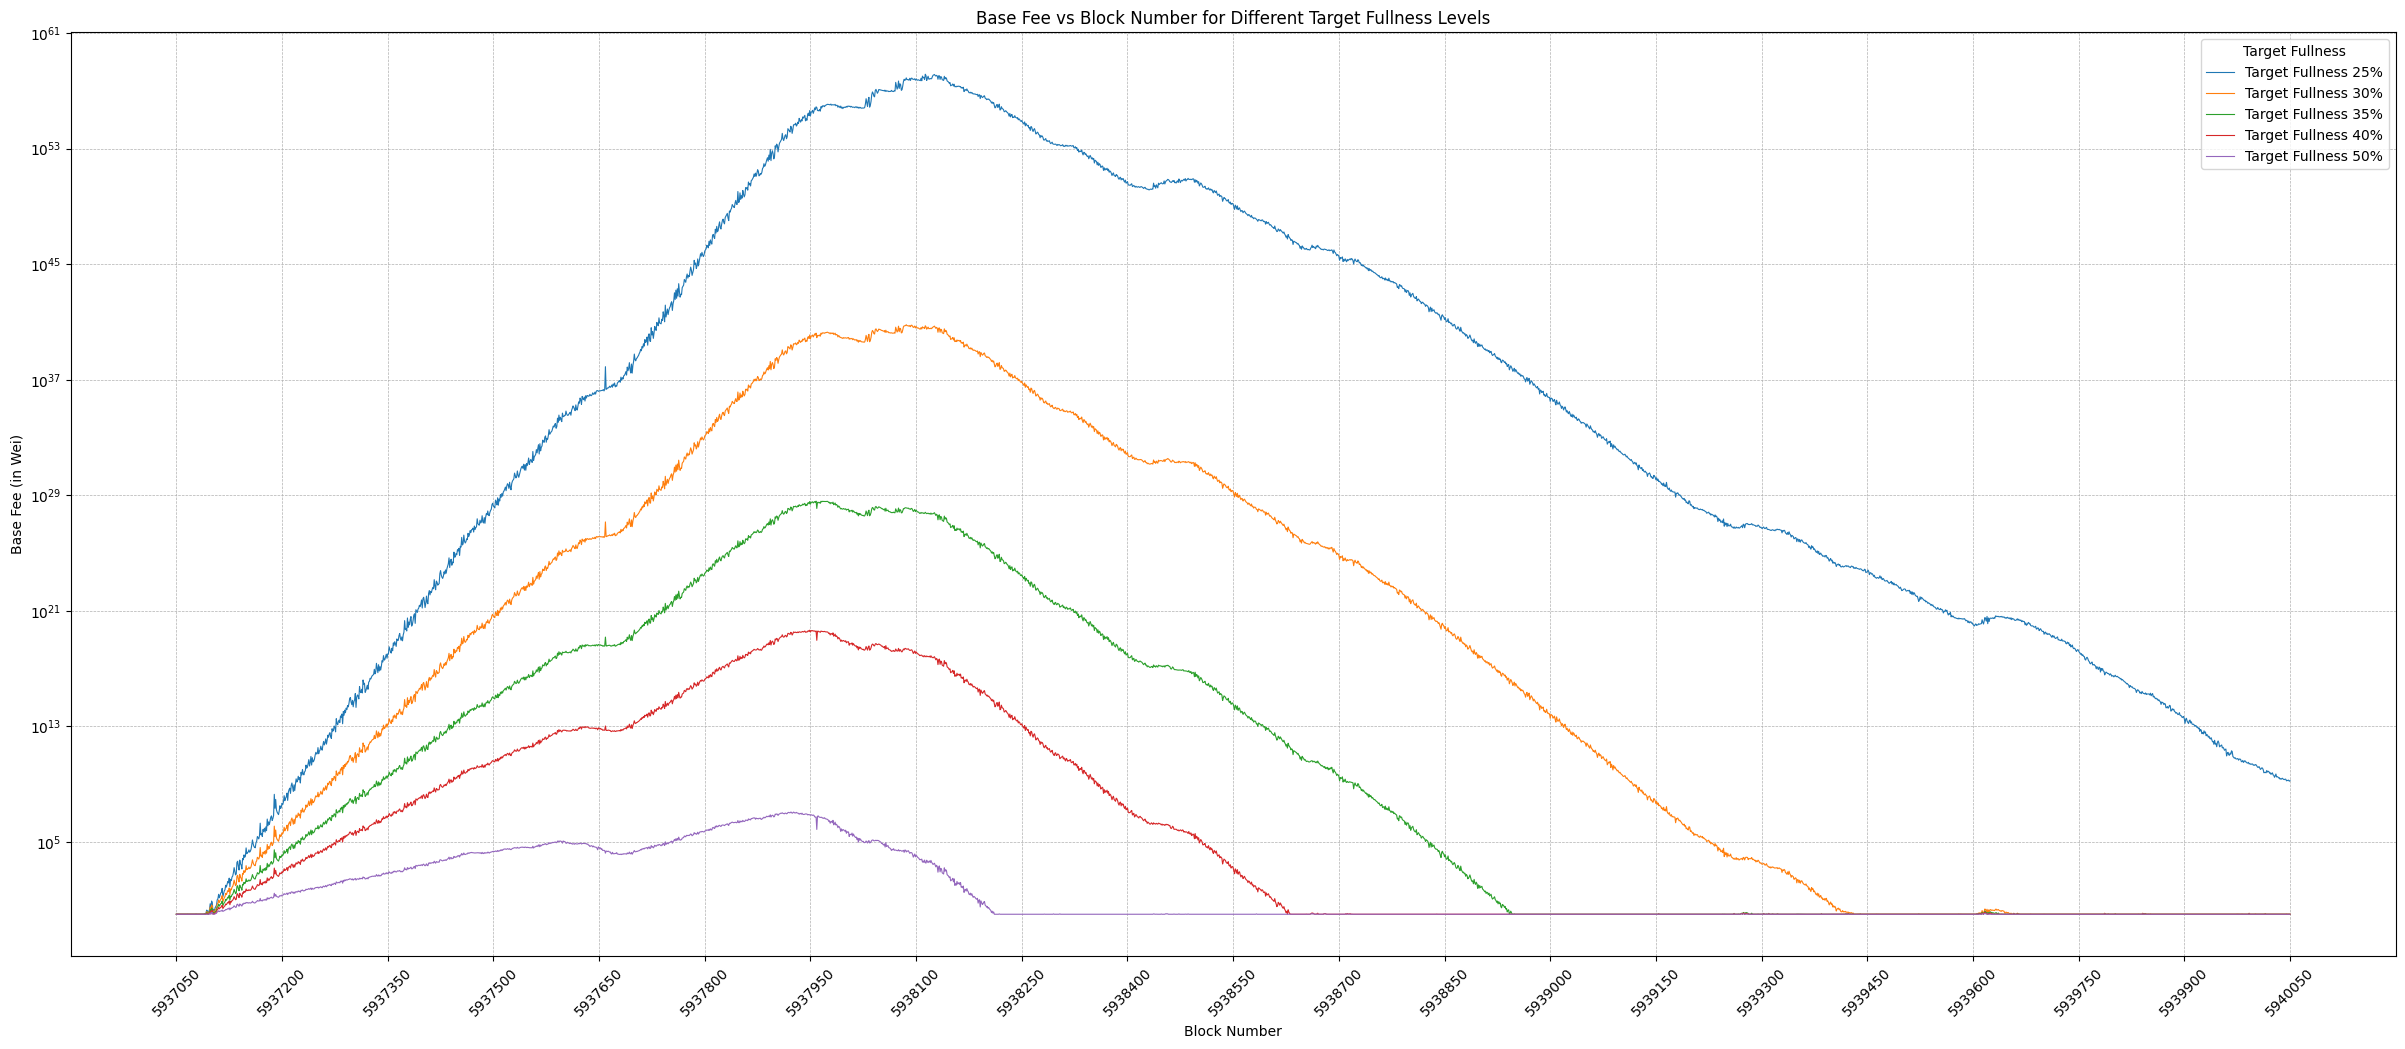

In [5]:
plot_data("block-eip1559-sim-5937050-5940050.json")

In the above graph, seems that the major activity happened between block 
5937080 and 5937950

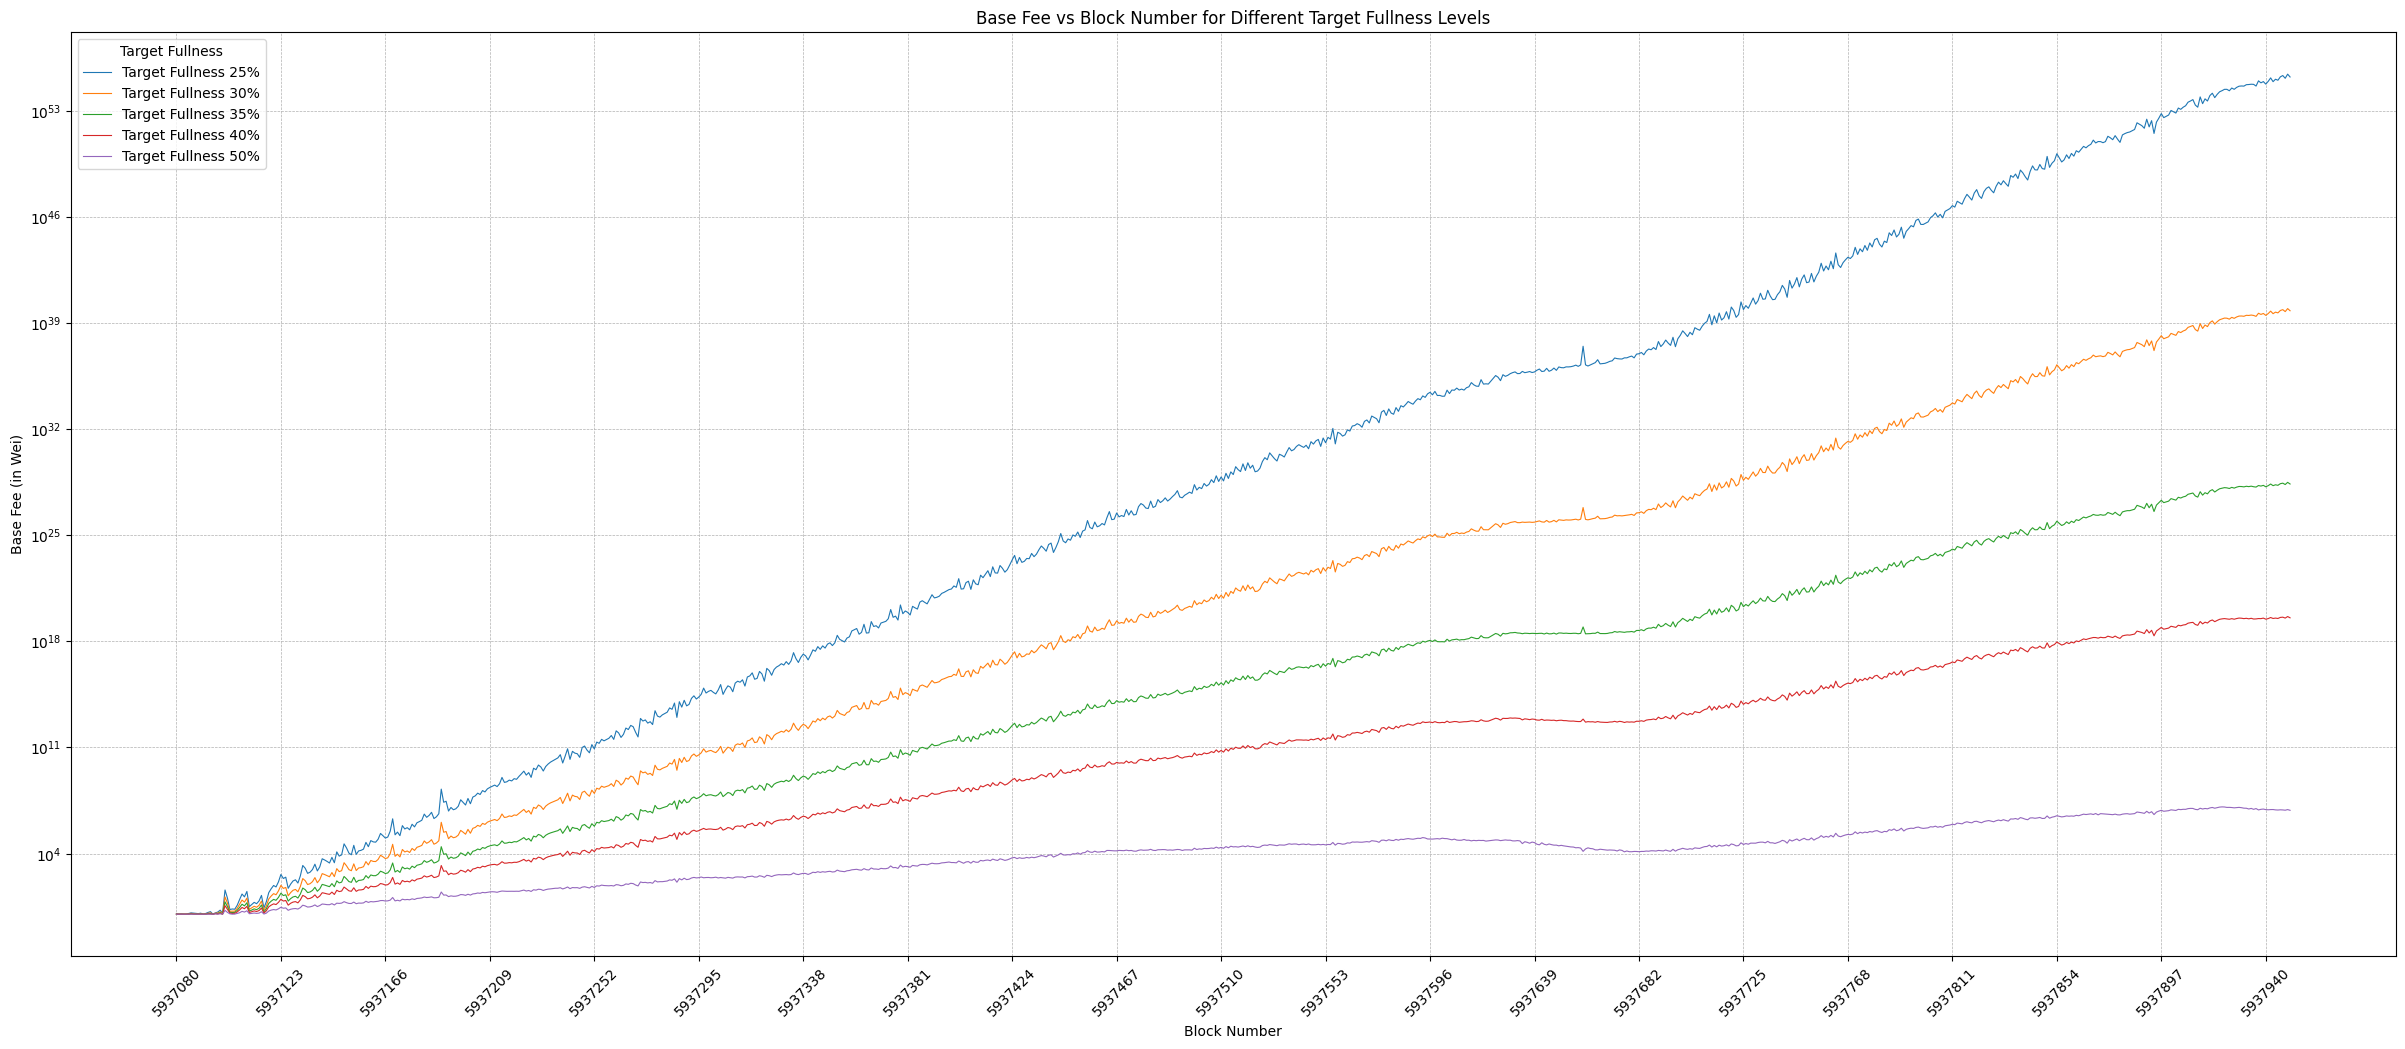

In [6]:
plot_data("block-eip1559-sim-5937080-5937950.json")

But collecting statistics in that range we have:

```
➜ npx ts-node src/tools/block-fullness-stats.ts --network moonbeam --from 5937080 --size 870 
========= Checking block 5937080...5937949
Total blocks: 869
Block Fullness Max 5937826: 76.38 (whole block: 101.38)
Block Fullness Min 5937894: 0.31 (whole block: 25.31)
Block Fullness Avg: 57.26
Block Fullness 90perc: 74.88 (whole block: 99.88)
Block Fullness 80perc: 72.74 (whole block: 97.74)
Block Fullness 70perc: 69.97 (whole block: 94.97)
Block Fullness 60perc: 67.54 (whole block: 92.54)
Block Fullness 50perc: 65.39 (whole block: 90.39)
Block Fullness 45perc: 62.69 (whole block: 87.69)
Block Fullness 40perc: 58.14 (whole block: 83.14)
Block Fullness 37.5perc: 56.10 (whole block: 81.10)
Block Fullness 35perc: 53.86 (whole block: 78.86)
Block Fullness 30perc: 49.79 (whole block: 74.79)
Block Fullness 20perc: 40.40 (whole block: 65.40)
Block Fullness 10perc: 28.77 (whole block: 53.77)
------- Simulated EIP1559 -------
Simulated 37.5perc, 56.10%: 4.762666148868758
Simulated 90perc, 74.88%: 3.4915959765456313e-12
Simulated 80perc, 72.74%: 4.2320593907834867e-11
Simulated 70perc, 69.97%: 1.3241565187480467e-9
Simulated 60perc, 67.54%: 3.379962645645963e-8
Simulated 50perc, 65.39%: 7.173765067079408e-7
Simulated 45perc, 62.69%: 0.00004394649490261146
Simulated 40perc, 58.14%: 0.10123168325968522
Simulated 35perc, 53.86%: 446.67254490813303
Simulated 30perc, 49.79%: 4498487.007285894
Simulated 20perc, 40.40%: 4858970590272474000
Simulated 10perc, 28.77%: 1.4798866892955421e+43
=========== Tx stats ===========
Total tx: 22764
Max TXs in a block: 155 in block 5937659
Min TXs in a block: 4 in block 5937894
Avg TXs in a block: 26.17
----- Tx per block distribution -----
Tx per block 90%: 41
Tx per block 80%: 35
Tx per block 70%: 31
Tx per block 60%: 28
Tx per block 50%: 25
Tx per block 45%: 23
Tx per block 40%: 22
Tx per block 37.5%: 21
Tx per block 35%: 20
Tx per block 30%: 19
Tx per block 20%: 16
Tx per block 10%: 13
```


# DUX

Analyzying DUX we have

Adriano's contract: https://moonscan.io/token/0xaeaef398304bcc6874daf935c4e0ac2553889ccd
start block: 5903130 Apr-09-2024 12:31:24 AM +UTC

plotting for the next 2000 blocks we observe 

```
npx ts-node src/tools/block-eip1559-sim.ts --network moonbeam --from 5903130 --size 2000 --target 25 30 35 40 50
```

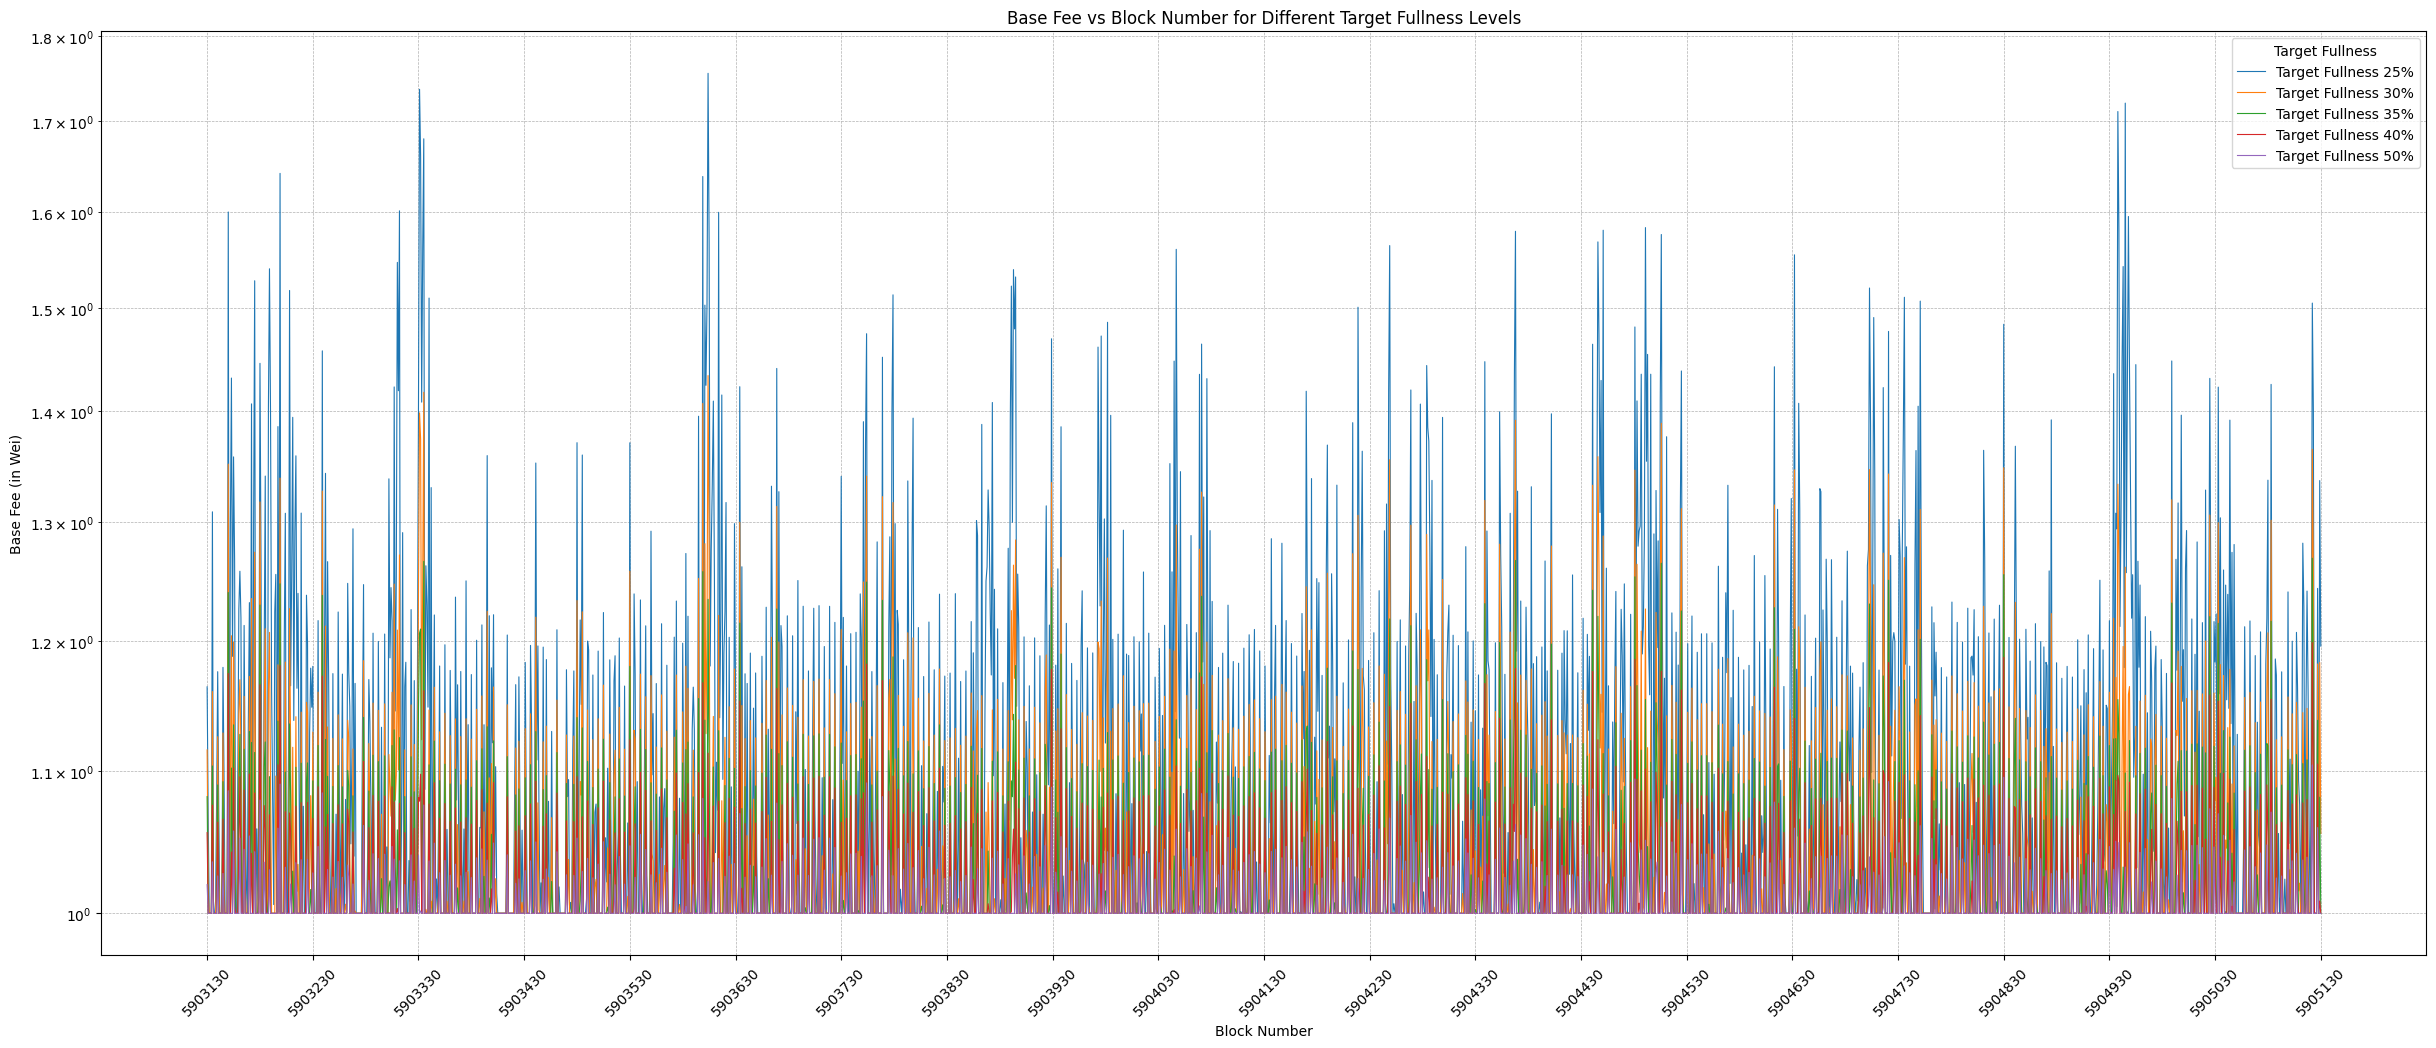

In [7]:
plot_data("block-eip1559-sim-5903130-5905130.json")

where we observe a situation without congestion, and extracting the statistics for this block range we have 

```
➜ npx ts-node src/tools/block-fullness-stats.ts --network moonbeam --from 5903130 --size 2000             
========= Checking block 5903130...5905129
Total blocks: 1999
Block Fullness Max 5903278: 74.28 (whole block: 99.28)
Block Fullness Min 5903194: 0.31 (whole block: 25.31)
Block Fullness Avg: 20.10
Block Fullness 90perc: 64.33 (whole block: 89.33)
Block Fullness 80perc: 43.70 (whole block: 68.70)
Block Fullness 70perc: 17.59 (whole block: 42.59)
Block Fullness 60perc: 11.45 (whole block: 36.45)
Block Fullness 50perc: 9.07 (whole block: 34.07)
Block Fullness 45perc: 8.24 (whole block: 33.24)
Block Fullness 40perc: 7.32 (whole block: 32.32)
Block Fullness 37.5perc: 6.90 (whole block: 31.90)
Block Fullness 35perc: 6.57 (whole block: 31.57)
Block Fullness 30perc: 5.85 (whole block: 30.85)
Block Fullness 20perc: 4.21 (whole block: 29.21)
Block Fullness 10perc: 2.50 (whole block: 27.50)
------- Simulated EIP1559 -------
Simulated 37.5perc, 6.90%: 3.29353474419688e+145
Simulated 90perc, 64.33%: 8.642204004501755e-80
Simulated 80perc, 43.70%: 1.692458972502264e-63
Simulated 70perc, 17.59%: 196271.7738883684
Simulated 60perc, 11.45%: 3.733290863097761e+58
Simulated 50perc, 9.07%: 1.0154923165788784e+95
Simulated 45perc, 8.24%: 5.465832866677615e+111
Simulated 40perc, 7.32%: 7.087102089348513e+133
Simulated 35perc, 6.57%: 3.3247417359314285e+155
Simulated 30perc, 5.85%: 2.702942988727664e+180
Simulated 20perc, 4.21%: 6.795176808615317e+260
Simulated 10perc, 2.50%: Infinity
=========== Tx stats ===========
Total tx: 22040
Max TXs in a block: 32 in block 5904063
Min TXs in a block: 4 in block 5903194
Avg TXs in a block: 11.02
----- Tx per block distribution -----
Tx per block 90%: 16
Tx per block 80%: 13
Tx per block 70%: 12
Tx per block 60%: 11
Tx per block 50%: 10
Tx per block 45%: 10
Tx per block 40%: 9
Tx per block 37.5%: 9
Tx per block 35%: 9
Tx per block 30%: 9
Tx per block 20%: 8
Tx per block 10%: 7
```

To get more clarity, since the distribution is uniform, we can zoom in a smaller set of blocks

```
npx ts-node src/tools/block-eip1559-sim.ts --network moonbeam --from 5903130 --size 500 --target 25 30 35 40 50

```

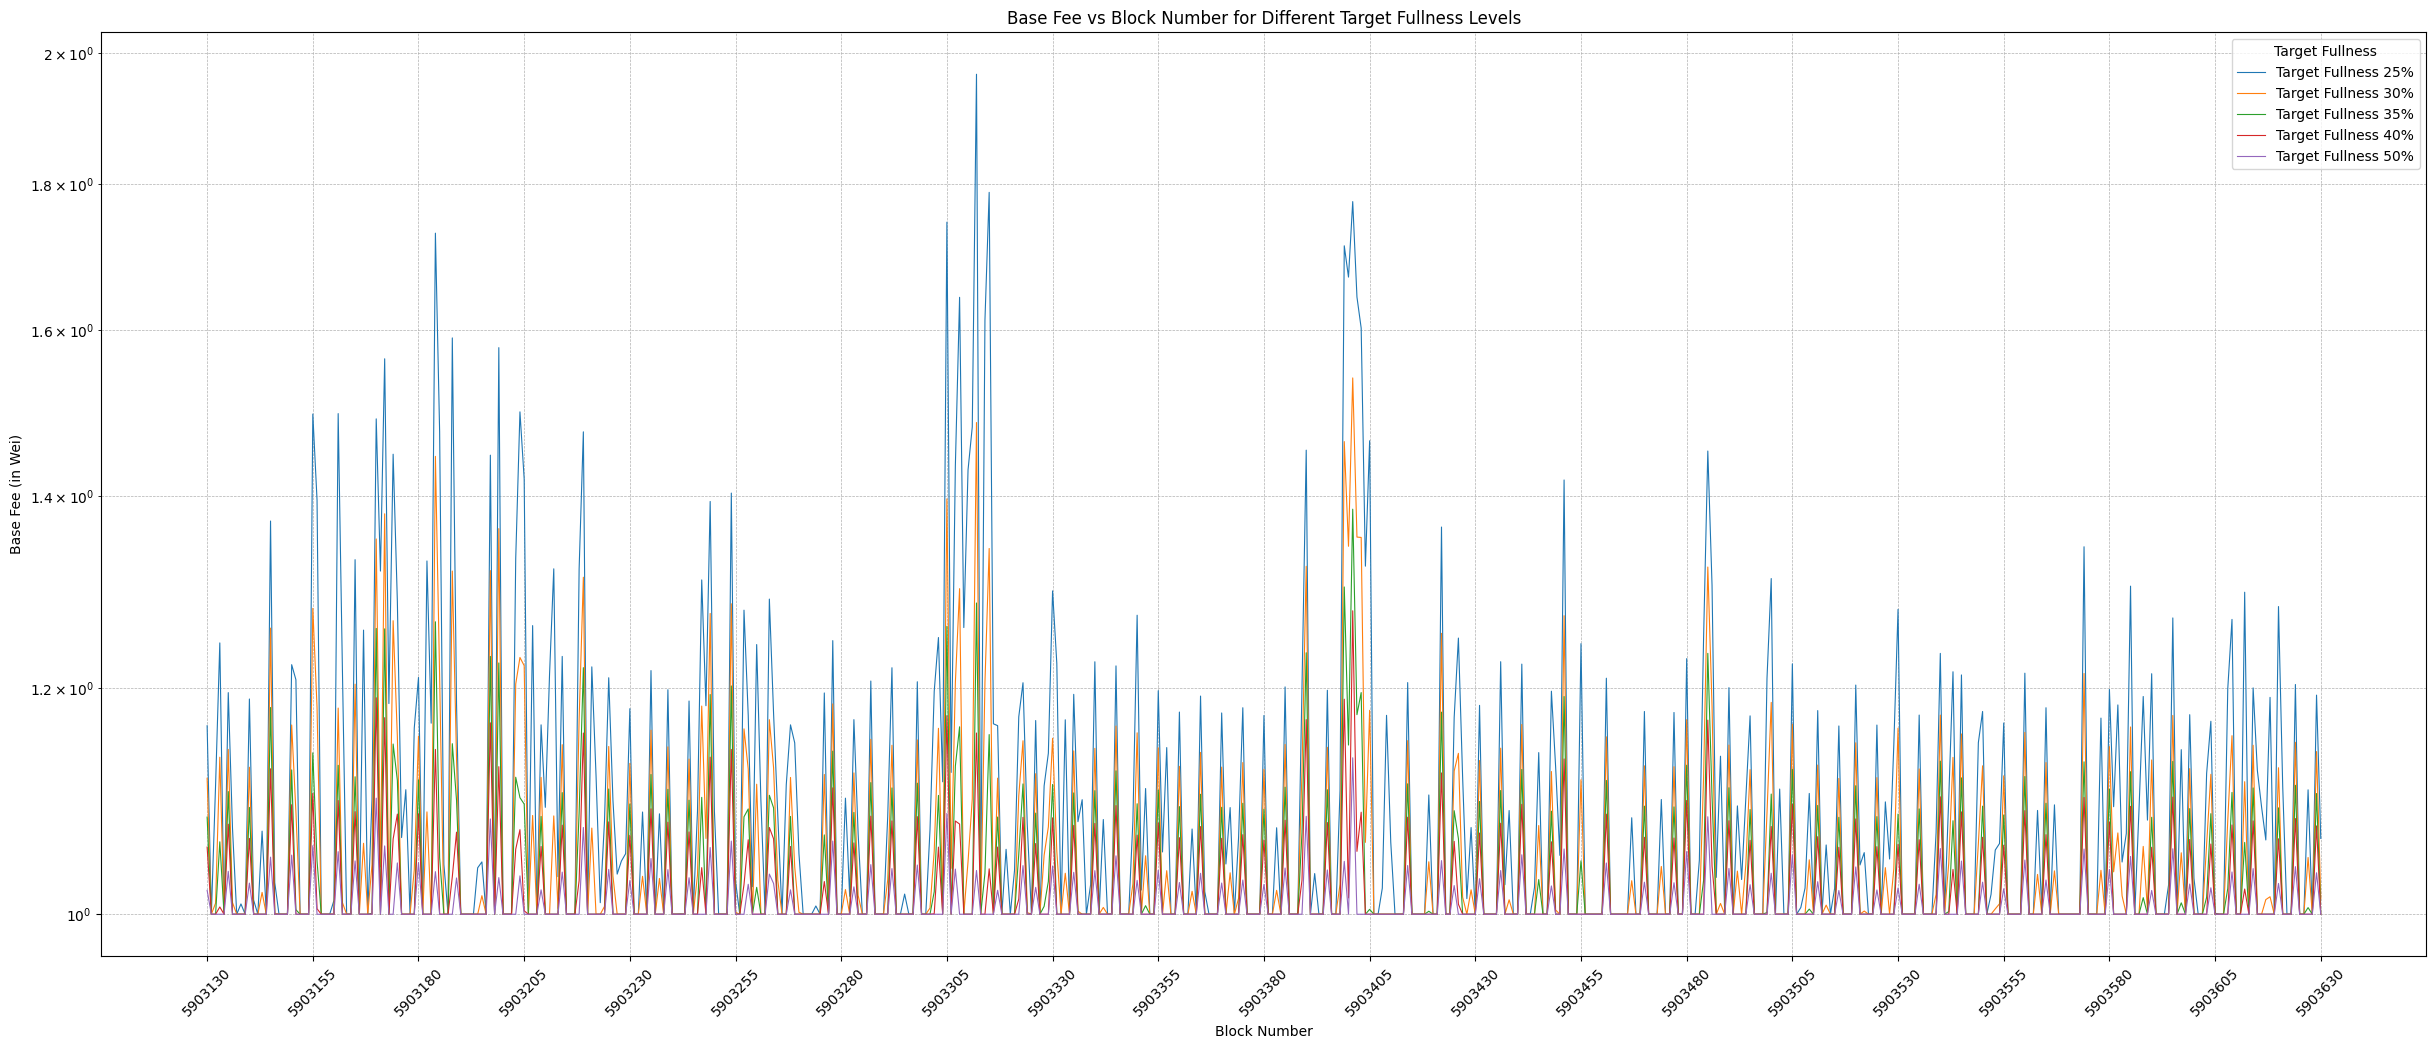

In [8]:
plot_data("block-eip1559-sim-5903130-5903630.json")

This is another example of the activity from XEN on the 24th of April

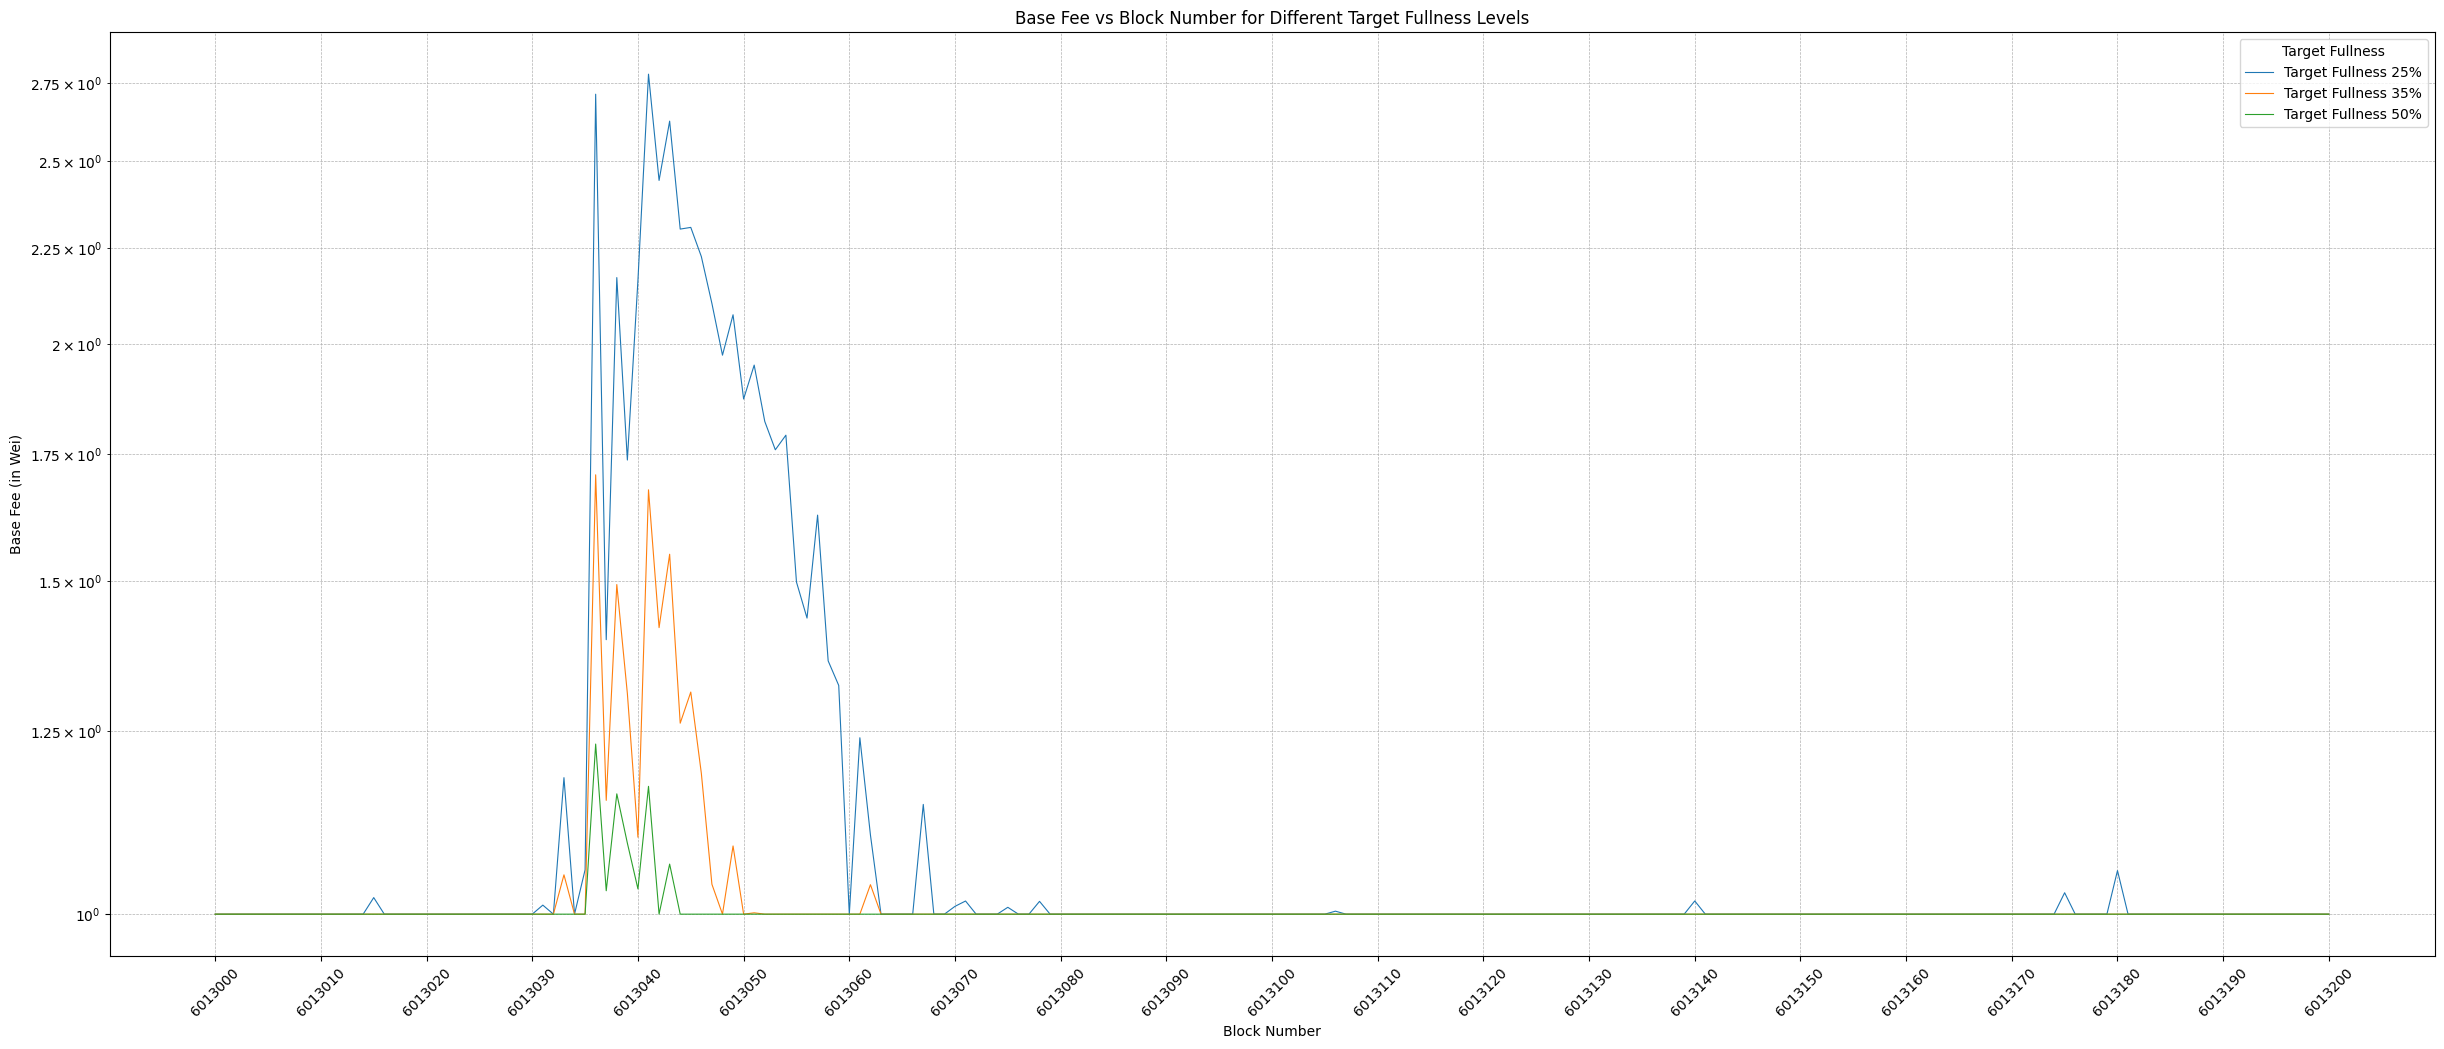

In [9]:
plot_data("block-eip1559-sim-6013000-6013200.json")